In [9]:
import pandas as pd
import seaborn as sns

In [11]:
df = pd.read_csv('/content/Admission_Predict.csv')

In [12]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [ ]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [13]:
from sklearn.preprocessing import Binarizer
bi = Binarizer(threshold=0.75)
df['Chance of Admit '] = bi.fit_transform(df[['Chance of Admit ']])

In [ ]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,1.0
1,2,324,107,4,4.0,4.5,8.87,1,1.0
2,3,316,104,3,3.0,3.5,8.00,1,0.0
3,4,322,110,3,3.5,2.5,8.67,1,1.0
4,5,314,103,2,2.0,3.0,8.21,0,0.0


In [16]:
x = df.drop('Chance of Admit ', axis = 1)
y = df['Chance of Admit ']

In [ ]:
x

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1,337,118,4,4.5,4.5,9.65,1
1,2,324,107,4,4.0,4.5,8.87,1
2,3,316,104,3,3.0,3.5,8.00,1
3,4,322,110,3,3.5,2.5,8.67,1
4,5,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1
396,397,325,107,3,3.0,3.5,9.11,1
397,398,330,116,4,5.0,4.5,9.45,1
398,399,312,103,3,3.5,4.0,8.78,0


In [ ]:
y

0      1.0
1      1.0
2      0.0
3      1.0
4      0.0
      ... 
395    1.0
396    1.0
397    1.0
398    0.0
399    1.0
Name: Chance of Admit , Length: 400, dtype: float64

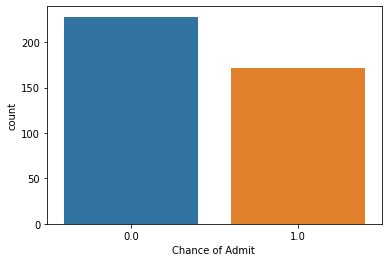

In [ ]:
sns.countplot(x = y);

In [20]:
#cross validation

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=0, test_size=0.25)


In [21]:
x_train.shape

(300, 8)

In [22]:
x_test.shape

(100, 8)

In [23]:
#import the class

from sklearn.tree import DecisionTreeClassifier

In [24]:
classifier = DecisionTreeClassifier()

In [25]:
classifier.fit(x_train, y_train)

DecisionTreeClassifier()

In [31]:
y_pred = classifier.predict(x_test)

In [33]:
result = pd.DataFrame({'actual': y_test,
                       'predicted': y_pred})

In [28]:
result

,actual,predicted
132,0.0,0.0
309,0.0,0.0
341,1.0,1.0
196,0.0,0.0
246,0.0,1.0
...,...,...
146,0.0,0.0
135,1.0,1.0
390,0.0,0.0
264,0.0,0.0


In [ ]:
from sklearn.tree import plot_tree


In [ ]:
import matplotlib.pyplot as plt

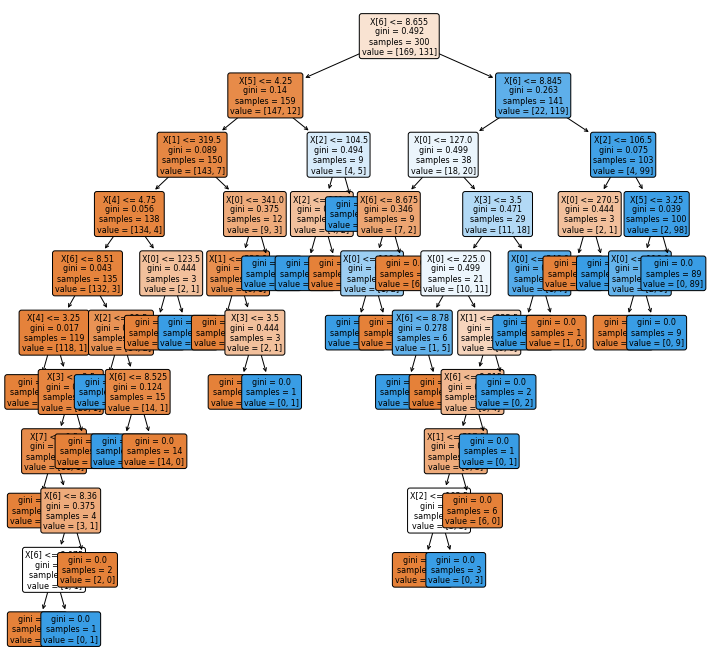

In [ ]:
plt.figure(figsize=(12,12))
plot_tree(classifier, fontsize=8, filled=True, rounded=True);